In [11]:
# import things

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pwd = os.getcwd()
os.chdir('/Users/slill/Code/EXP/build/pyEXP/')
# print(os.getcwd())
import pyEXP
os.chdir(pwd)


import numpy as np
import matplotlib.pyplot as plt
sims_dir = '/Users/slill/Documents/Projects/exp-extreme-MWLMC/data/extreme-mwlmc'
mssa_dir = '/Users/slill/Documents/Projects/exp-extreme-MWLMC/data/mssa'

In [12]:
# lmc coefs
lmchalo_coefs = pyEXP.coefs.Coefs.factory(f'{sims_dir}/outcoef.lmchalo.RunGGG')
lmchalo_keylst = lmchalo_coefs.makeKeys([])



In [13]:
lmchalo_coefs2 = pyEXP.coefs.Coefs.factory(f'{sims_dir}/outcoef.lmchalo.RunGG')


In [16]:
print(len(lmchalo_coefs.Times()))
print(len(lmchalo_coefs2.Times()))

733
1901


In [20]:
lmchalo_coefs2.Times()[-1]

3.04

In [18]:
lmchalo_coefs.Times()

[0.0,
 0.0016,
 0.0032,
 0.0048,
 0.0064,
 0.008,
 0.0096,
 0.0112,
 0.0128,
 0.0144,
 0.016,
 0.0176,
 0.0192,
 0.0208,
 0.0224,
 0.024,
 0.0256,
 0.0272,
 0.0288,
 0.0304,
 0.032,
 0.0336,
 0.0352,
 0.0368,
 0.0384,
 0.04,
 0.0416,
 0.0432,
 0.0448,
 0.0464,
 0.048,
 0.0496,
 0.0512,
 0.0528,
 0.0544,
 0.056,
 0.0576,
 0.0592,
 0.0608,
 0.0624,
 0.064,
 0.0656,
 0.0672,
 0.0688,
 0.0704,
 0.072,
 0.0736,
 0.0752,
 0.0768,
 0.0784,
 0.08,
 0.0816,
 0.0832,
 0.0848,
 0.0864,
 0.088,
 0.0896,
 0.0912,
 0.0928,
 0.0944,
 0.096,
 0.0976,
 0.0992,
 0.1008,
 0.1024,
 0.104,
 0.1056,
 0.1072,
 0.1088,
 0.1104,
 0.112,
 0.1136,
 0.1152,
 0.1168,
 0.1184,
 0.12,
 0.1216,
 0.1232,
 0.1248,
 0.1264,
 0.128,
 0.1296,
 0.1312,
 0.1328,
 0.1344,
 0.136,
 0.1376,
 0.1392,
 0.1408,
 0.1424,
 0.144,
 0.1456,
 0.1472,
 0.1488,
 0.1504,
 0.152,
 0.1536,
 0.1552,
 0.1568,
 0.1584,
 0.16,
 0.1616,
 0.1632,
 0.1648,
 0.1664,
 0.168,
 0.1696,
 0.1712,
 0.1728,
 0.1744,
 0.176,
 0.1776,
 0.1792,
 0.1808,
 0.

In [3]:
# define ssa stuff
window = int(len(lmchalo_coefs.Times())/2)
npc = 100


In [4]:
# load default mssa lmc halo

flags_eigen ="""
---
# chatty: on
"""
config = {
        #   "MW halo": (mwhalo_coefs, mwhalo_keylst, []),
        #   "MW disc": (mwdisc_coefs, mwdisc_keylst, []),
          "LMC halo": (lmchalo_coefs, lmchalo_keylst, []),
        #   "LMC disc": (lmcdisc_coefs, lmcdisc_keylst, [])
          } 

ssa_eigen = pyEXP.mssa.expMSSA(config, window, npc, flags_eigen)
ssa_eigen.restoreState(f"{mssa_dir}/lmchalo_default") 

---- Eigen is using 10 threads


In [5]:
flags_trbdcsvd ="""
---
# chatty: on
BDCSVD : true
Traj : true
"""

ssa_trbdcsvd = pyEXP.mssa.expMSSA(config, window, npc, flags_trbdcsvd)
ssa_trbdcsvd.restoreState(f"{mssa_dir}/lmch_traj_bdcsvd") 

In [6]:
config_trrand = {
        #   "MW halo": (mwhalo_coefs, mwhalo_keylst, []),
        #   "MW disc": (mwdisc_coefs, mwdisc_keylst, []),
          "LMCH": (lmchalo_coefs, lmchalo_keylst, []),
        #   "LMC disc": (lmcdisc_coefs, lmcdisc_keylst, [])
          } 
flags_trrand ="""
---
# chatty: on
BDCSVD : false
Traj : true
"""

ssa_trrand = pyEXP.mssa.expMSSA(config_trrand, window, npc, flags_trrand)
ssa_trrand.restoreState(f"{mssa_dir}/traj_random_LMCH") 

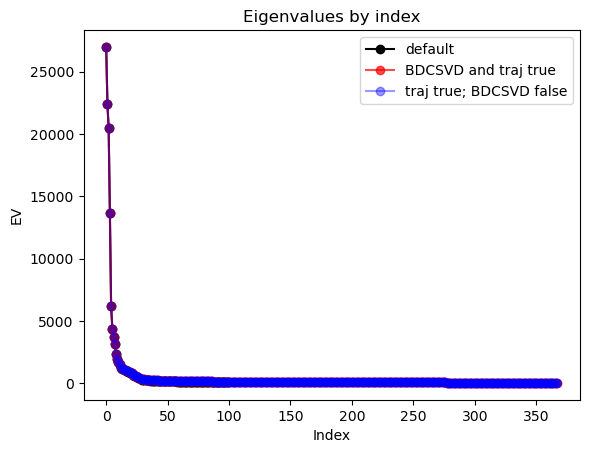

In [7]:

ev = ssa_eigen.eigenvalues()
ev2 = ssa_trbdcsvd.eigenvalues()
ev3 = ssa_trrand.eigenvalues()
plt.plot(ev, 'o-', c='k', label='default')
plt.plot(ev2, 'o-', c='r', alpha=0.7, label='BDCSVD and traj true')
plt.plot(ev3, 'o-', c='b', alpha=0.4, label='traj true; BDCSVD false')
plt.xlabel("Index")
plt.ylabel("EV")
plt.title("Eigenvalues by index")
plt.legend()
plt.show()

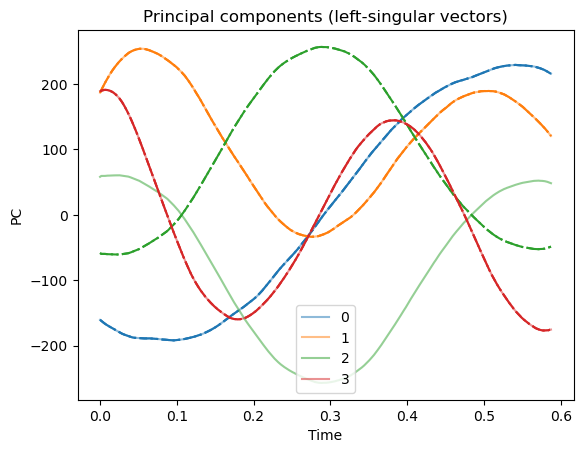

In [8]:
pc = ssa_eigen.getPC() # also triggers the expensive step
pc2 = ssa_trbdcsvd.getPC()
pc3 = ssa_trrand.getPC()

rows, cols = pc.shape
rows2, cols2 = pc2.shape
rows3, cols3 = pc3.shape

for i in range(min(cols,cols2,4)):
    plt.plot(lmchalo_coefs.Times()[0:rows], pc[:,i], '-', c=f'C{i}', alpha=0.5, label="{:d}".format(i))
    plt.plot(lmchalo_coefs.Times()[0:rows2], -pc2[:,i], '--', c=f'C{i}')
    plt.plot(lmchalo_coefs.Times()[0:rows3], -pc3[:,i], '-.', c=f'C{i}')

plt.xlabel('Time')
plt.ylabel('PC')
plt.legend()
plt.title("Principal components (left-singular vectors)")
plt.show()

In [9]:
ssa_eigen.reconstruct([0,1])

In [10]:
import multiprocessing

multiprocessing.cpu_count()

10